# Uncertainty in Spatial Correlation

This work has been published by **Mehdi Rezvandehy** and **Clayton V. Deutsch** at [Journal of Petroleum Geoscience](https://doi.org/10.1144/petgeo2016-161) https://doi.org/10.1144/petgeo2016-161. **Python** implementation for calculating uncertainty in spatial correlation (variogram) and how to incorporate this uncertainty in geostatistical modeling is presented. If you have any question about the approach and implementation, please email at [Mehdi Rezvandehy](rezvande@ualberta.ca).

# Abstract

**Inferring a stable variogram model (spatial correlation) from widely-spaced data is a longstanding challenge. Correct uncertainty in the calculated variogram should be quantified and incorporated in geostatistical modeling. A new approach of variogram uncertainty is presented by computing the degrees of freedom. Variogram realizations are drawn from the uncertainty interval of lag distances honoring the correlation between lags. The realizations, respecting the correlation between lag distances of different directions, are transferred to geostatistical simulation to incorporate variogram uncertainty in the final numerical models.**

# Introduction

An important challenge in reservoir management is establishing reliable numerical geological models of all required rock and fluid properties including porosity, permeability and  water saturation. These numerical models are driven by conceptual geology, seismic, production history and well data that are widely-spaced early in exploration. The variogram model is required by most geostatistical approaches to build these numerical models. Variogram modeling fits an analytical model to the experimental variogram computed from the data to filter noise in the experimental points and provide a model for all possible distances and direction. 

The analytical variogram model is uncertain since there is unavoidable uncertainty associated with the experimental variogram. **Figure 1** shows a 2-D synthetic example of permeability with 20 wells (see Fig. 1-a). **Figure 1**-b shows omnidirectional (azimuth $0^{\circ} \pm 90^{\circ} $) experimental variogram of the 20 wells where a reliable analytical variogram model cannot be fitted to the experimental variogram due to high variogram uncertainty; two high and low range analytical variogram models are fitted to demonstrate the impact of different variogram models. **Figure 1**-c and 1-d show one realizations of sequential Gaussian simulation (SGS) of well data in **Figure 1**-a using high range variogram model (Fig. 1-c) and low range variogram model (Fig. 1-d). The difference between
realizations is due to different variogram models; high variogram range leads to high continuity (see Fig. 1-c) and low variogram range leads to more heterogeneity (see Fig. 1-d). Thereby, using one variogram model for geostatistical simulation may lead to an unrealistic final model especially in presence of sparse well data.} Variogram uncertainty could be calculated and incorporated in the final model. Although there are many references on calculating and using the variogram, few authors have considered variogram uncertainty. The current approaches of variogram uncertainty are based on a sampling scheme  or the covariance matrix of the experimental variogram. These methods are not robust and lead to a very high variogram uncertainty that may bias the final model (see **Figure 1** for the impact of variogram uncertainty). 

A new approach of quantifying variogram uncertainty is presented. Incorporating the correct variogram uncertainty in geostatistical reservoir models reduces risk in reservoir decision-making since the variogram often has a direct impact on flow simulation. 

<img src="./Images/fig1.png" alt="drawing" width="800"/>

**Figure 1**: *Synthetic example of showing the impact of low and high range variogram models on geostatistical simulation. (a) A 2D synthetic example of permeability with 20 wells. (b) Omnidirectional (azimuth $0^{\circ} \pm 90^{\circ} $) experimental variogram of the 20 wells; a reliable analytical variogram model cannot be fitted due to high variogram uncertainty; two high and low range analytical variogram models are fitted. (c) One realizations of SGS using high range variogram model. (d) One realizations of sequential SGS  using a low range variogram model. The difference between **Figure**-c and **Figure**-d is due to different variogram models.*
 

# Variogram Uncertainty by Direct Calculation of Degrees of Freedom (DoF)

Since the shape of the variogram distribution for each lag distance is reasonably a Chi-square distribution, the new approach of quantifying variogram uncertainty is proposed by the theoretical calculation of degree of freedom (DoF) for variogram pairs. This is called the DoF approach for quantifying variogram uncertainty. The mean of a Chi-square distribution for variogram distribution of each lag distance is $\gamma (\textbf{h})$:
\begin{equation} \label{eq:10}
E \left \{ f( \widehat{\gamma}(\textbf{h})) \right \} \sim E \left \{\chi_{DoF}^2 \times \frac{\gamma (\textbf{h})}{DoF}\right \}= \gamma (\textbf{h})
\end{equation}

because the mean of $\chi_{DoF}^2$ is DoF. $\gamma (h)$ is second order moments
(variogram) from fitting a variogram model to a sample variogram computed from the data. The variance of the Chi-square distribution of each lag distance ($Var \left \{ f( \widehat{\gamma}(\textbf{h})) \right \}$) is written as:
\begin{equation} \label{eq:11}
Var \left \{ f( \widehat{\gamma}(\textbf{h})) \right \} \sim Var \left \{\chi_{DoF}^2 \times \frac{\gamma (\textbf{h})}{DoF}  \right \}=  (\frac{\gamma (\textbf{h})}{DoF})^{2}\times  Var\left \{ \chi_{DoF}^2 \right \}= \frac{2\times \gamma (\textbf{h})^{2}}{DoF}
\end{equation} 

because $ Var \left \{ \chi_{DoF}^2 \right \}$ is $2\times DoF$. The only unknown parameter for calculating variogram uncertainty (variance) is DoF, which is the effective or independent number of variogram pairs. A theoretical derivation for calculating DoF is given in achieved by covariance matrix of data locations:
\begin{equation} \label{eq:12}
DoF=\frac{(\sum_{i=1}^{n}C_{ii})^2}{\sum_{i=1}^{n}\sum_{j=1}^{n}C_{ij}^2}\,\,\,\,\,\,\,,\,\,\,\,\,\,\,\,i,j=1,....,n
\end{equation} 

where $C_{ii}$ and $C_{ij}$ are diagonal elements and off-diagonal elements of a covariance matrix between data locations ($n$), respectively. The diagonal elements of a covariance matrix is the covariance of each data location to itself which is the variance of data. Equation above gives theoretical DoF for data locations. Since there are pairs instead of locations for the experimental variogram, fourth order covariances are used in Equation above to calculate DoF of each lag distance:
\begin{equation} \label{eq:13}
DoF=\frac{(\sum_{i=1}^{n(\textbf{h})}F{(i-i)})^2}{\sum_{i=1}^{n(\textbf{h})}\sum_{j=1}^{n(\textbf{h})}F(i-j)^{2}} \,\,\,\,\,\,\,,\,\,\,\,\,\,\,\,i,j=1,....,n(\textbf{h})
\end{equation} 

where $n(\textbf{h})$ is number of variogram pairs for lag distance $\textbf{h}$ and $F(i-i)$ is the fourth order covariance of pair $i$ to itself, and $F(i-j)$ is the fourth order covariance between pairs $i$ and $j$. By calculating DoF of each lag distance, the variogram distribution and variogram uncertainty is achieved. 

# Variogram Uncertainty in Geostatistcial Modeling

The DoF approach of quantifying variogram uncertainty calculates the degrees of freedom of each lag distance to build the Chi-square distribution. After building the Chi-square distribution of each lag, variogram realizations should be drawn from the uncertainty interval of the variogram lags (Figure 2) and used in geostatistical simulation to incorporate variogram uncertainty in the final model. These realizations should preserve the correlation between lags. Otherwise, the variogram realizations will be noisy and unrealistic. LU simulation can be applied with the correlation matrix of lag distances. The correlated Gaussian realizations are back-transformed to the marginal Chi-square distribution of each lag distance.

<img src="./Images/fig2.png" alt="drawing" width="500"/>

**Figure 2**: *Schematic of six variogram realizations drawn from the variogram distribution of lag distances: the blue curve is the Chi-square distribution for each lag distance, the red dot is the mean of the each Chi-square distribution (the fitted variogram model) and the gray lines are the correlated variogram realizations.*


## LU Simulation and Back-transformation 

Realizations of LU simulation preserve the correlation between variables. In the present context, LU simulation can be applied with the correlation matrix of the variogram lag distances. LU realizations have a multivariate Gaussian distribution and can be back-transformed to the marginal Chi-square distribution for each lag distance approximately preserving the final correlation values. Figure 3-a shows the correlation matrix $\boldsymbol{\rho}$ between lags. The diagonal elements of this correlation matrix is 1, which is the correlation of each lag to itself. Figure 3-b shows LU simulation of the correlation matrix. Cholesky decomposition of the correlation matrix $\textbf{L}$ is multiplied by an uncorrelated standard normal deviate $\textbf{w}=\left [ \textbf{w}_{1}.....\textbf{w}_{n} \right ]$ (mean=0, standard deviation=1) to achieve the correlated Gaussian realization $\textbf{y}=\left [ \textbf{y}_{1}.....\textbf{y}_{n} \right ]$. Where $n$ is the number of lags. The Gaussian distribution of each lag distance is computed by generating many LU realizations (say 100 realizations). Then, the values from the Gaussian distribution are back-transformed to the Chi-square distribution of each lag distance by quantile-quantile transformation (see Figure 4). The procedure is summarized by:


1- Define a stationary covariance function C($\textbf{h}$) that comes from the fitted variogram model to the experimental variogram ($\gamma (\textbf{h})$) (after variogram declustering in case of preferential sampling).

2- Define the Chi-square reference distribution of each lag distance $F_{l,DoF}(z), \,\,\, l=1,...,n$. Where $n$ is the number of lag distance.	

3- Construct the spatial lag-to-lag correlation matrix $\boldsymbol{\rho}$. 

4- Compute the Cholesky decomposition of the correlation matrix as  $\boldsymbol{\rho}=\textbf{LL}^{T}$. 

5- Simulate a vector of uncorrelated standard normal deviate $\textbf{w}$. 		

6- Generate a vector of correlated Gaussian realization $\textbf{y}=\textbf{Lw}$. 	 	

7- Lookup through the standard Gaussian CDF value of each lag distance $\textbf{p}=G(\textbf{y})$. Where $G$ is the standard normal distribution.

8- Lookup the Chi-square distribution of each lag distance $\textbf{z}= F^{-1}_{l,DoF}(\textbf{p})$. Where $\textbf{z}$ is the Chi-square correlated realization.


Steps 5 to 6 are repeated for multiple realizations (see Figure 3-b). Then, Steps 7 to 8 calculate the correlated variogram realizations in Chi-square distribution (see Figure 4). This approach ensures the variogram realizations respect the correlation between lag distances.


<img src="./Images/fig3.png" alt="drawing" width="900"/>

**Figure 3**: *a) Correlation matrix $\boldsymbol{\rho}$  between lags. The diagonal elements of this covariance matrix is 1. b) LU simulation with the correlation matrix. Cholesky decomposition of the correlation matrix is multiplied by an uncorrelated standard normal deviate to achieve the correlated Gaussian realizations.*

<img src="./Images/fig4.png" alt="drawing" width="800"/>

**Figure 4**: *A schematic illustration of quantile-quantile transformation of each Gaussian realization (Real) to the Chi-square realization. The Gaussian distribution of each lag distance ($G(\textbf{y})$) is back-transformed to the Chi-square distribution ($F_{l,DoF}(z)$) to calculate the correlated variogram realizations.*



# Parameter file for ***Vardec*** Code

A FORTRAN code **VarUn** is written by Mehdi Rezvandehy for variogram uncertainty. Uncertainty in the variogram is automatically calculated by this code. A realistic example is presented how to run this code in jupyter notebook. The table below shows the parameter file for **VarUn** FORTRAN code for calculating variogram uncertainty. The code by default calculates variogram uncertainty for both FOM (forth order moment) and DoF (degree of fredom) approaches. Dof is more reliable than other approach. SGK (simple global kriging) and OGK (ordinary global kriging) are optional (see **line 8**). A base case variogram model is required for all approaches. The experimental variogram realizations are modeled automatically inside the code. The data file is given to the code in **line 4**. This file should be a ASCII flat file compatible with Geo-EAS. **Line 5** defines X, Y and Z coordinates. **Line 6** indicates column number of the variable for calculating variogram uncertainty. Trimming limits are indicated in **line 7**. **Line 8** asks user to calculate variogram uncertainty the variable for calculating variogram uncertainty. If so, 1 (GK) is for SGK and 0 (GK) is for OGK. **Line 9** to **11** define grid definition for the area of interest for variogram uncertainty by global kriging if GK=1. **Line 12** specifies grid increment for discretization the study area A into many variogram pairs for each lag distance for variogram uncertainty by global kriging if GK=1. These discretization of variogram pairs are used in the left hand size covariance matrix for global kriging approach. If grid increment is chosen to 1, all possible variogram pairs are attained for each lag distance. In case of large grids (say bigger than $100\times100$ ), grid increment 1 leads to a computer cost. **Line 13** to **18** specify parameters for variogram calculation: number of lag **Line 13**, lag distance **Line 14**, lag tolerance **Line 15**. **Line 16** to **18** define directions of variogram calculation. Variogram uncertainty is just applied for one direction: in case of isotopic or omnidirectional variograms and two directions : in case of anisotropic variograms which only major and minor directions of continuity are needed. The first direction should be the major direction of continuity. **Line 19** and **Line 20** indicate standardizing (yes(1) or no(0)) for experimental variogram and variogram realizations to sill 1 as we discussed in this paper. **Line 21** is random number seed for variogram realizations. **Line 22** defines number of variogram realizations. Autofitting software could lead to artifacts for modeling the experimental variogram realizations: in case of more than one variogram structure, the range of first variogram structure should not be very low or very high.
 
In order to avoid this, a\_hmax (variogram range in major direction) and a\_hmin (variogram range in major direction) of the first variogram structure for all variogram realizations could be enforced to be within the scaled a\_hmax and a\_hmin of the first structure of base case variogram model. **Line 23** defines this range scale. For example, if range scale is 2: a\_hmax1 and a\_hmin1 are the ranges of the first structure of the base case variogram mode, variogram realizations should be within [-2$\times$ a\_hmax1, 2$\times$ a\_hmax1] and [-2 $\times$ a\_hmin1, 2$\times$ a\_hmin1]. This prevents giving a very low or very high range to the first structure. If range scale is 1, no correction is applied. **Line 24** is variogram realizations limits for variogram plot. **Line 25** is output file for correlation matrix between lag distances. **Line 26** to **Line 31** specifies the output file variogram model and plot of variogram realization by FOM (**Line 26, 27**), by DoF (**Line 28, 29**), by SGK or OGK (**Line 30, 31**). Variogram model of all realizations are written in the output file. Variogram plots give variogram realizations before (top variogram) and after variogram fitting for each direction. **Line 32** to **34** are the base case variogram model fitted to the experimental variogram. This variogram model is required for estimating fourth order covariance of all variogram uncertainty techniques.

                  
                                          Parameters for VarUn
                                       **************************                               
                    START OF PARAMETERS:            
        Line 4      Data.dat                         - file with data
        Line 5      1  2  3                          - columns for X, Y, Z coordinates
        Line 6      4                                - col number for variable
        Line 7      -1.0e21   1.0e21                 - trimming limits
        Line 8      0    1                           - global kriging, simple(1)/ordinary(0) 
        Line 9      50  0.5  1.0                     - nx, xmn, xsiz (ignore if GK=0)
        Line 10     50  0.5  1.0                     - ny, ymn, ysiz (ignore if GK=0)
        Line 11     50  0.5  1.0                     - nz, zmn, zsiz (ignore if GK=0)
        Line 12     2                                - grid increment, 1 considering all blocks 
        Line 13     10                               - number of lags
        Line 14     5.0                              - lag separation distance
        Line 15     2.5                              - lag tolerance
        Line 16     2                                - number of directions
        Line 17     0  10 10 0 90 50                 - azm,atol,bandh,dip,dtol,bandv (major)
        Line 18     20 10 10 0 90 50                 - azm,atol,bandh,dip,dtol,bandv (minor)
        Line 19     1                                - standardize experimental variogram 
        Line 20     1                                - standardize variogram realizations 
        Line 21     12521                            - random number seed
        Line 22     100                              - number of variogram realizations
        Line 23     1                                - range scale
        Line 24     0  1.3                           - variogram limits for variogram plot
        Line 25     corr.out                         - correlation matrix between lag distance 
        Line 26     FOM.out                          - variogram realizations (FOM)
        Line 27     FOM.ps                           - file for variogam ploting (FOM)
        Line 28     DoF.out                          - variogram realizations (DOF)
        Line 29     DoF.ps                           - file for variogram ploting (DOF)
        Line 30     GK.out                           - variogram realizations (global kriging)
        Line 31     GK.ps                            - file for variogam ploting (global kriging)
        Line 32     1  0                             - nst,nugget effect 
        Line 33     1  1  0  0  0                    - it,cc,ang1,ang2,ang3 
        Line 34     35  35  10                       - a_hmax, a_hmin, a_vert

In [9]:
import os
os.environ['path']+=";.\\Codes"  # All required codes are in this folder
import pandas as pd
import numpy as np
import matplotlib 
import pylab as plt
from matplotlib import gridspec
from matplotlib.offsetbox import AnchoredText
import geostatspy.GSLIB as GSLIB                      
import geostatspy.geostats as geostats  
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')
from IPython.display import HTML

In [10]:
# First run Appendix that includes all required python function.

# Realistic Example

A realistic example is presented for variogram uncertainty. The
variable of interest is averaged permeability (in milliDarcies) over the main reservoir
layer. Realizations of variogram for major and minor directions of continuity are calculated and used for geostatistical simulation one at the time: each variogram realization for each realization. This leads to incorporate uncertainty of the calculated variogram in final model.


In [11]:
# Looking at the data 
Data=GSLIB_View('Data.out')
display(Data[0:10])

,Well,X,Y,Por,Per,Seis,Facies,Declustering,NS:Por,NS:Per
0,70.0,9856.0,5652.0,9.474762,15.478810,49759.0,1.0,1.011788,0.42050,1.70214
1,75.0,9767.0,4271.0,10.096829,16.021707,46004.0,1.0,1.099382,1.04898,1.92143
2,101.0,8062.0,9321.0,9.816727,3.380182,48587.0,1.0,0.229545,0.67934,0.04018
3,499.0,6760.0,10102.0,9.288545,2.065273,48161.0,1.0,0.856238,0.37959,-0.17629
4,536.0,5763.0,5382.0,9.993800,9.932000,48644.0,1.0,1.145308,0.90147,0.90070
5,537.0,7149.0,5336.0,9.904000,6.573750,48060.0,1.0,1.145308,0.77012,0.47480
6,538.0,7172.0,4079.0,11.126098,13.442927,46249.0,1.0,1.133827,1.68972,1.25004
7,540.0,4598.0,4151.0,10.329200,12.575000,45929.0,1.0,1.027922,1.23918,1.15974
8,541.0,3132.0,4061.0,7.121064,1.675319,46259.0,1.0,1.145308,-0.37552,-0.26315
9,547.0,3100.0,2728.0,9.144286,10.932500,45996.0,1.0,1.145308,0.24036,1.00719


In [12]:
Data.describe()

,Well,X,Y,Por,Per,Seis,Facies,Declustering,NS:Por,NS:Per
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,600.129032,5121.225806,5767.145161,8.401975,5.183824,47062.677419,1.419355,1.000000,0.116212,0.046571
std,145.658762,3060.123235,3132.727073,1.918138,5.476293,2548.985570,0.497482,0.286067,1.015154,0.979528
min,70.000000,72.000000,85.000000,4.025192,0.075345,42942.000000,1.000000,0.229545,-2.356000,-2.423330
25%,548.250000,2199.250000,3187.250000,6.749593,0.753652,45307.750000,1.000000,1.030740,-0.570075,-0.569207
50%,596.500000,5746.500000,6111.500000,8.978583,3.666798,46254.500000,1.000000,1.145308,0.134485,0.054100
75%,732.000000,7808.750000,8970.000000,9.922711,7.437034,48218.750000,2.000000,1.145308,0.818030,0.694137
max,760.000000,9918.000000,10102.000000,11.383667,26.809123,53957.000000,2.000000,1.145308,2.367190,2.356000


Figure below shows location map of porosity data with 62 samples (left) and histogram of data (right).

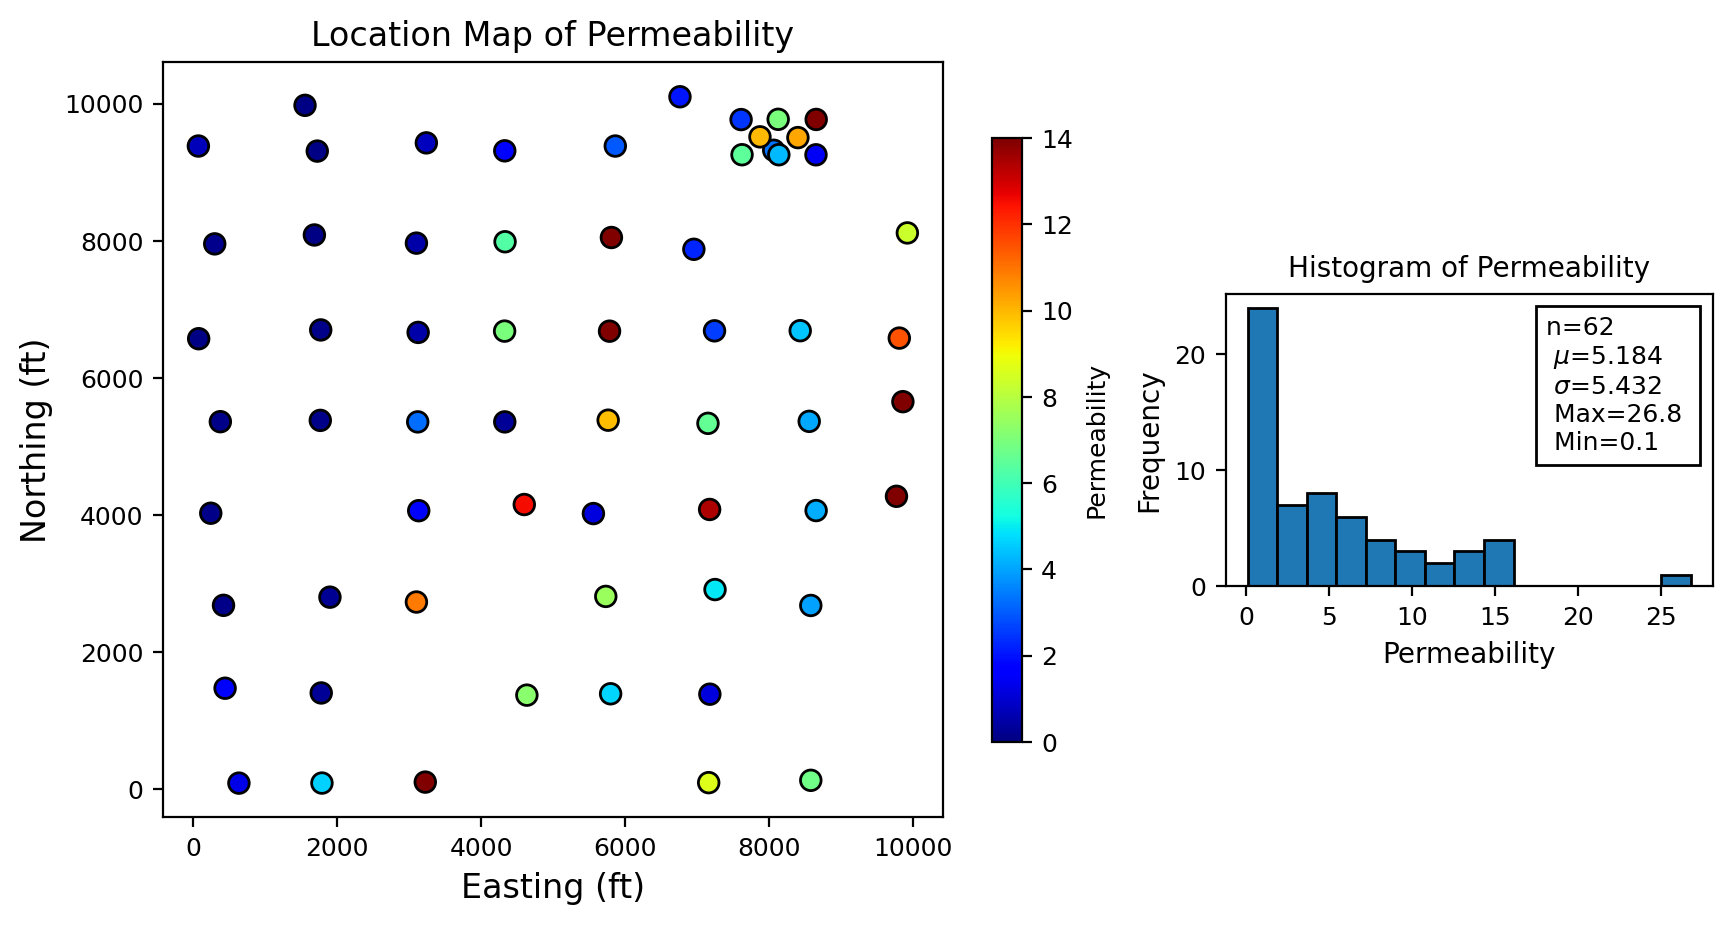

In [13]:
font = {'size'   : 9}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(10, 5), dpi= 200, facecolor='w', edgecolor='k')
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1], wspace=0.12)
ax1=plt.subplot(gs[0])
plt.scatter(Data['X'], Data['Y'],c=Data['Per'],s=55,linewidths=1,edgecolors='k',
            cmap='jet',vmin=0, vmax=14)       

plt.colorbar(shrink=0.8,label='Permeability')   
plt.xlabel('Easting (ft)',fontsize='12')
plt.ylabel('Northing (ft)',fontsize='12')
plt.title('Location Map of Permeability',fontsize=12)

ax1=plt.subplot(gs[1]) 
plt.xlabel('Permeability',fontsize='10')
plt.ylabel('Frequency',fontsize='10')
plt.hist(Data['Per'], bins=15,ec='black')
n=len(Data['Per'])
Mean=np.mean(Data['Per'])
SD=np.sqrt(np.var(Data['Per'])) 
Max=np.amax(Data['Per'])
Min=np.amin(Data['Per'])
#plt.xlim(0,20)
plt.title('Histogram of Permeability',fontsize=10)
plt.gca().set_aspect('0.7')
txt='n=%.0f \n $\mu$=%.3f \n $\sigma$=%.3f \n Max=%.1f \n Min=%.1f'
anchored_text = AnchoredText(txt %(n,Mean,SD,Max,Min), loc=1)
ax1.add_artist(anchored_text)
plt.show()

## Variogram

In [14]:
#Experimental Variogram with Nromal Score and then fit a theoretical model 

#Azimith 0: Experimental Variogram
tmin=-100;tmax=10000;xlag=1000;xltol=750;nlag=10;azm=0;atol=22.5;bandwh=99999;isill=1
Lag1, Var1, npp_az0=geostats.gamv(Data,'X', 'Y','NS:Per',tmin,tmax,xlag,xltol,nlag,azm,atol,bandwh,isill)

#Azimith 0: Fitted variogram Model Parameters
nlag=100; xlag=100
vario={'nst':2,'nug':0.0, 'cc1':0.2,'it1':2,'azi1':0,'hmaj1':1000,'hmin1':1000,
     'cc2':0.8,'it2':1,'azi2':0,'hmaj2':15000,'hmin2':15000}
index_az0,Lag1_fit,Var1_fit,cov_az0,ro_az0=geostats.vmodel(nlag, xlag, azm, vario)

#Azimith 90: Experimental Variogram
tmin=-100;tmax=10000;xlag=1000;xltol=750;nlag=10;azm=90;atol=22.5;bandwh=99999;isill=1
Lag2, Var2, npp_az90=geostats.gamv(Data,'X', 'Y','NS:Por',tmin,tmax,xlag,xltol,nlag,azm,atol,bandwh,isill)
#Fitted Model: Fitted variogram Model Parameters
nlag=100; xlag=100
vario={'nst':2,'nug':0.0, 'cc1':0.2,'it1':2,'azi1':0,'hmaj1':1000,'hmin1':1000,
     'cc2':0.8,'it2':1,'azi2':0,'hmaj2':4500,'hmin2':4500}
index_az90,Lag2_fit,Var2_fit,cov_az90,ro_az90=geostats.vmodel(nlag, xlag, azm, vario)
clear_output()

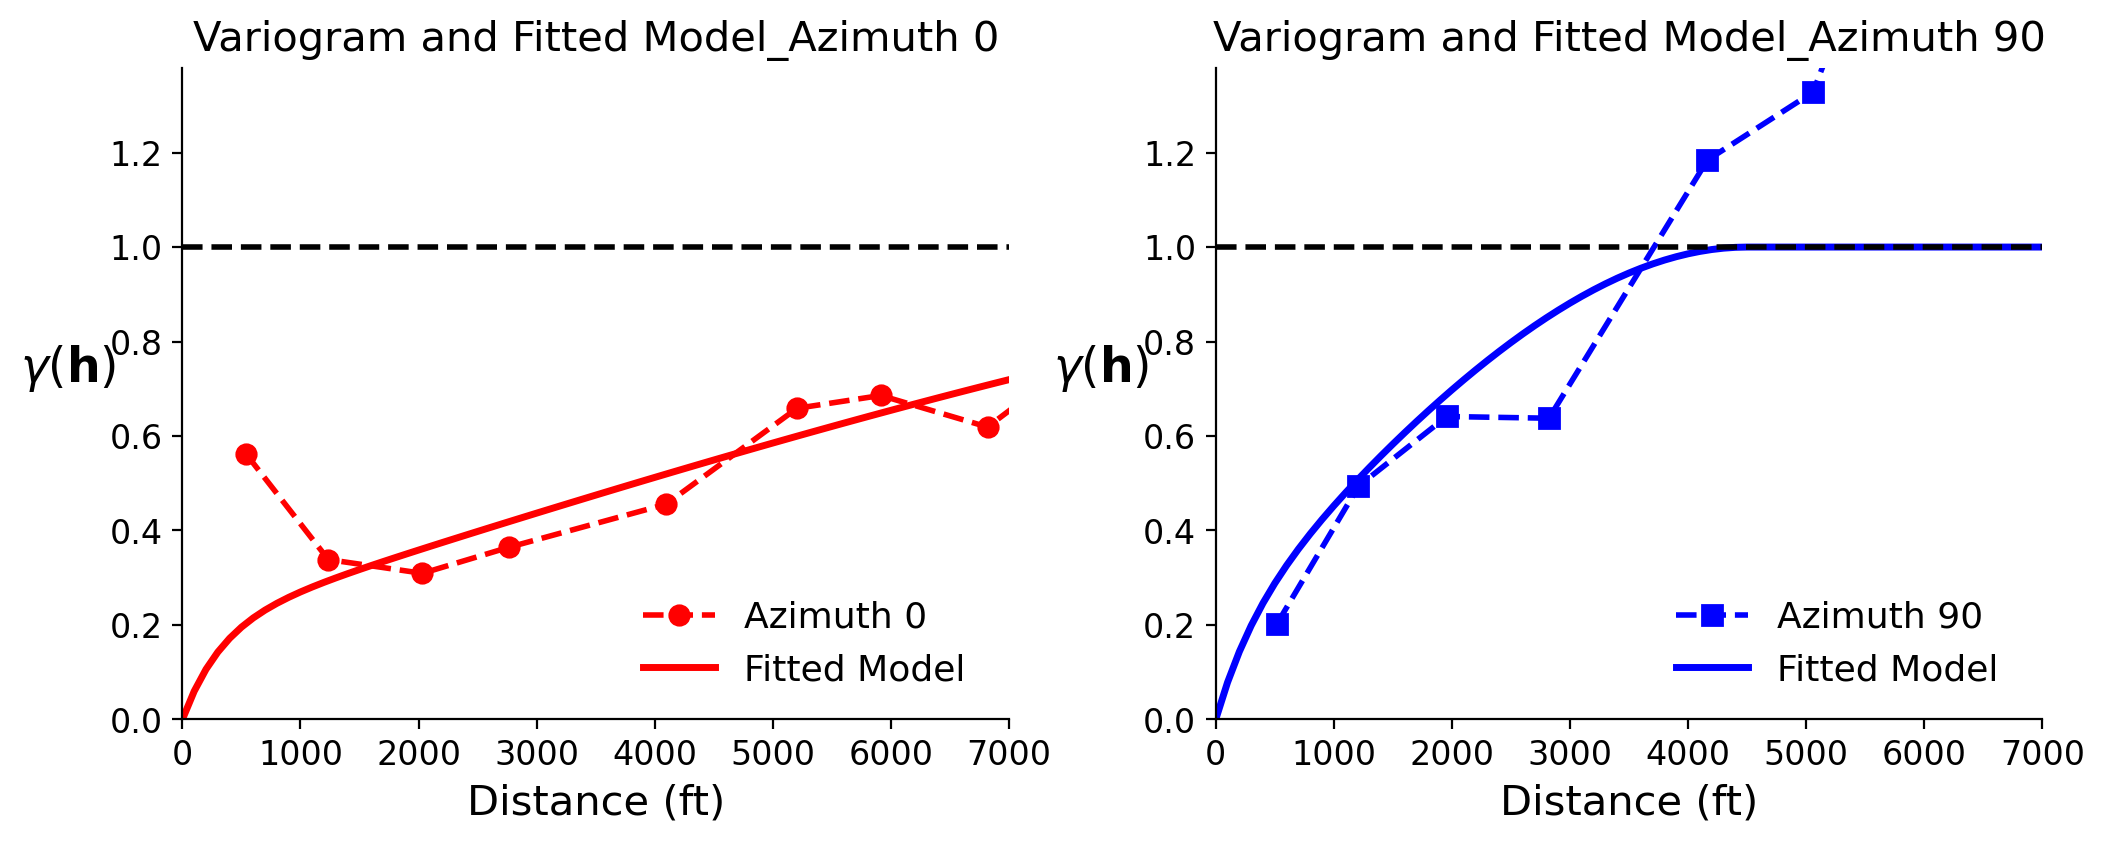

In [15]:
# Plot variogram models
font = {'size'   : 12}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(12,12), dpi= 200, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .05, wspace=0.25) 
#   
#Label and Title of Variogram Plot
label1='Azimuth 0 ' ;symbol1='--or';label1_fit='Fitted Model ';symbol1_fit='-r'
label2='Azimuth 90 ';symbol2='--sb';label2_fit='Fitted Model ';symbol2_fit='-b'
xlabl='Distance (ft)'; xlim=[0,7000]; vlim=[0,1.38]; sill=1;loc=4

ax1=plt.subplot(1,2,1) 
#Plot Variograms for Azimith 0
Lag1=np.delete(Lag1, np.where(Var1==0))
Var1=np.delete(Var1, np.where(Var1==0))
plt.plot(Lag1, Var1,symbol1,linewidth=2,markersize=7,label=label1)          
plt.plot(Lag1_fit, Var1_fit,symbol1_fit,linewidth=2.5,label=label1_fit) 
plt.legend(fontsize=13,loc=loc,frameon=False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().set_aspect('4000')
plt.axhline(y=sill,linewidth=2,color='k',linestyle='--')
title='Variogram and Fitted Model_Azimuth 0'
plt.title(title,fontsize=15)  
plt.xlabel(xlabl,fontsize=15)
ylabl='$\gamma (\mathbf{h}) $'
plt.ylabel(ylabl,rotation=0,fontsize=17,labelpad=15)
plt.xlim(float(xlim[0]),float(xlim[1]))
plt.ylim(float(vlim[0]),float(vlim[1])) 

ax1=plt.subplot(1,2,2) 
#Plot Variogramz for Azimith 90
Lag2=np.delete(Lag2, np.where(Var2==0))
Var2=np.delete(Var2, np.where(Var2==0))
plt.plot(Lag2, Var2,symbol2,linewidth=2,markersize=7,label=label2)          
plt.plot(Lag2_fit, Var2_fit,symbol2_fit,linewidth=2.5,label=label2_fit)      
plt.legend(fontsize=13,loc=loc,frameon=False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().set_aspect('4000')
plt.axhline(y=sill,linewidth=2,color='k',linestyle='--')
title='Variogram and Fitted Model_Azimuth 90'
plt.title(title,fontsize=15)  
plt.xlabel(xlabl,fontsize=15)
ylabl='$\gamma (\mathbf{h}) $'
plt.ylabel(ylabl,rotation=0,fontsize=17,labelpad=15)
plt.xlim(float(xlim[0]),float(xlim[1]))
plt.ylim(float(vlim[0]),float(vlim[1])) 
clear_output()
plt.show() 

## Run VarUn Code for Calculating Variogram Uncertainty 

Call **VarUn** Fortran code in python for calculating variogram uncertainty for Azimuth 0 and 90 degrees. 100 variogram realizations are simulated.

In [16]:
# Call VarUn Fortran code in Python for variogram declustering

txt="                                 Parameters for VarUn \n"\
+"                                  *************************** \n"\
+"START OF PARAMETERS:\n"\
+"Data.out                                 - file with data \n"\
+"2    3    0                               - columns for X, Y, Z coordinates \n"\
+"10                                        - col number for variable \n"\
+"-100     1.0e21                           - trimming limits \n"\
+"0    1                                    - global kriging variance yes(GK=1)/no(GK=0), simple(1)/ordinary(0) \n"\
+"50   100   200                            - nx, xmn, xsiz (ignore if GK=0) \n"\
+"50   100   200                            - ny, ymn, ysiz (ignore if GK=0) \n"\
+"1    0.5    1.0                           - nz, zmn, zsiz (ignore if GK=0) \n"\
+"3                                         - grid increment, 1 considering all blocks (ignore if GK=0) \n"\
+"7                                         - number of lags \n"\
+"1000                                      - lag separation distance \n"\
+"750                                       - lag tolerance \n"\
+"2                                         - number of directions \n"\
+"0    22.5  99999   0.0  0.5  5.0          - azm,atol,bandh,dip,dtol,bandv \n"\
+"90   22.5  99999   0.0  0.5  5.0          - azm,atol,bandh,dip,dtol,bandv \n"\
+"1                                         - standardize experimental variogram \n"\
+"1                                         - standardize variogram realizations \n"\
+"1251                                      - random number seed \n"\
+"100                                       - number of variogram realizations \n"\
+"1.4                                       - range scale: enforce variogram range of first structure (<1 not apply) \n"\
+"0    -1.2                                 - variogram realizations limits for vriogram plot (from data if max<min) \n"\
+"./VariogramUncertainty/corr.out          - correlation matrix between lag distance \n"\
+"./VariogramUncertainty/FOM.out           - Variogram realizations of FOM approach \n"\
+"./VariogramUncertainty/FOM.ps            - output file for variogam ploting of FOM approach \n"\
+"./VariogramUncertainty/DoF.out           - Variogram realizations of DoF approach \n"\
+"./VariogramUncertainty/DoF.ps            - output file for variogam ploting of DoF approach \n"\
+"./VariogramUncertainty/GK.out            - Variogram realizations of global kriging approach \n"\
+"./VariogramUncertainty/GK.ps             - output file for variogam ploting of global kriging  approach \n"\
+"2    0.000                                -  nst, nugget effect \n"\
+"2    0.2   0.0   0.0   0.0                -  it,cc,ang1,ang2,ang3 \n"\
+"        1000       1000       1           -  a_hmax,a_hmin,a_vert \n"\
+"1    0.8  0.0   0.0   0.0                 -  it,cc,ang1,ang2,ang3 \n"\
+"     15000.000   4500.000     1           -  a_hmax,a_hmin,a_vert \n"
f1 = open('temp', "w");
f1.write(txt)
f1.close()

! echo temp | VarUn
! rm temp

clear_output()

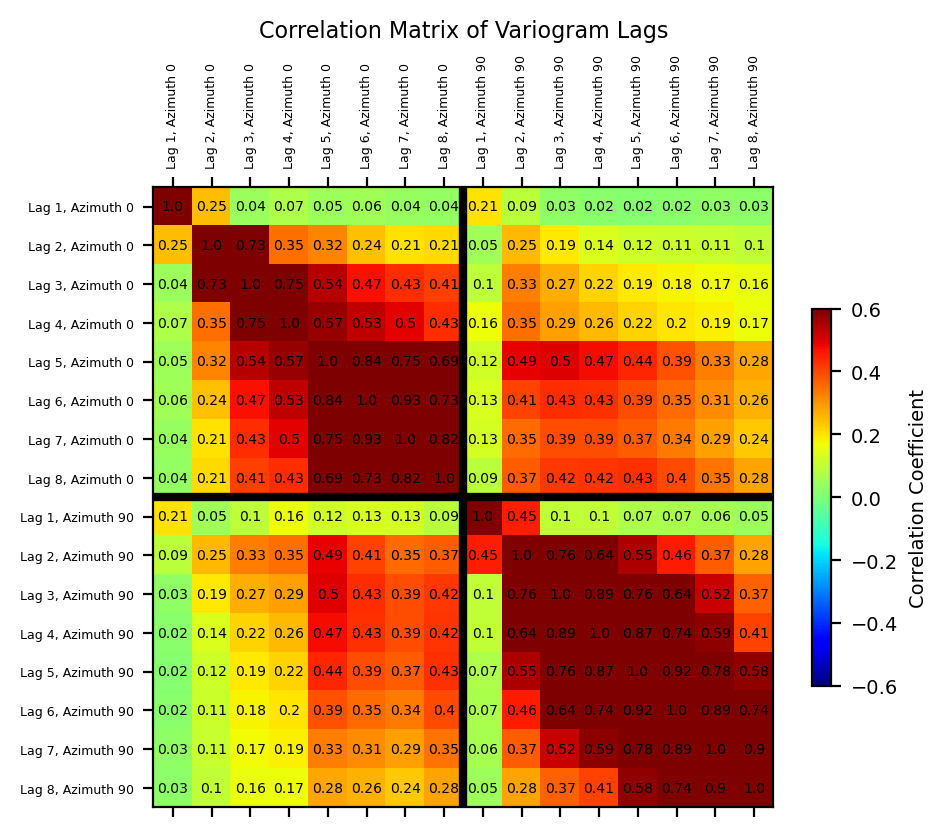

In [17]:
# Plot covariance matrix between lag distances
font = {'size'   : 7}
matplotlib.rc('font', **font)
fig, ax=plt.subplots(figsize=(5, 5), dpi= 200, facecolor='w', edgecolor='k')

corr=GSLIB_View('./VariogramUncertainty/corr.out')
corr.drop('lag',axis=1, inplace=True)
corr=corr.values
colu_Az0=['Lag ' +str(i+1)+', Azimuth 0' for i in range(8)]
colu_Az90=['Lag ' +str(i+1)+', Azimuth 90' for i in range(8)]
columns=colu_Az0+colu_Az90
cax =ax.matshow(corr, cmap='jet', interpolation='nearest',vmin=-0.6, vmax=0.6)
fig.colorbar(cax,shrink=0.5,label='Correlation Coefficient')
plt.title('Correlation Matrix of Variogram Lags', fontsize=8,y=1.0)
for i in range(16):
    for j in range(16):
        c = corr[j,i]
        ax.text(i, j, str(round(c,2)), va='center', ha='center',fontsize=5)
plt.axvline(x=7.5,linewidth =3,color='k')
plt.axhline(y=7.5,linewidth =3,color='k')
ax.set_xticks(np.arange(len(columns)))
ax.set_xticklabels(columns,fontsize=4.5, rotation='vertical')
ax.set_yticks(np.arange(len(columns)))
ax.set_yticklabels(columns,fontsize=4.5)

plt.show() 

*Correlation matrix between the sampled variogram realizations for eight lag distances of azimuth 0◦ and eight lag distances of azimuth 90◦.*

## Read Variogram Realization Calculated by VarUn

In [18]:
# Variogram uncertainty calculated by degree of freedom (DoF) approach works better than other approaches.
# Varigram uncertinaty calculated by DoF approach is read in python for vissualization.

DoF='./VariogramUncertainty/DoF.out'

Lag_f_0=[]; Gamma_f_0=[]
Lag_f_90=[]; Gamma_f_90=[]
nlag=100; xlag=100; azm=0
nsim=100
nst=np.zeros((nsim)); nug=np.zeros((nsim)); cc1=np.zeros((nsim)); it1=np.zeros((nsim)); azi1=np.zeros((nsim)); 
hmaj1_0=np.zeros((nsim)); hmin1_0=np.zeros((nsim)); hmaj1_90=np.zeros((nsim));hmin1_90=np.zeros((nsim))
#
cc2=np.zeros((nsim)); it2=np.zeros((nsim)); azi2=np.zeros((nsim));
hmaj2_0=np.zeros((nsim)); hmin2_0=np.zeros((nsim));hmaj2_90=np.zeros((nsim)); hmin2_90=np.zeros((nsim))
#
insim=0
with open(DoF) as f:
    i=0
    j=0
    for line in f:
        i=i+1
        p = line.split()
        if(i==2): nst[insim]=int(float(p[0])); nug[insim]=float(p[1])
        if(i==3): cc1[insim]=float(p[1]); it1[insim]=int(float(p[0])); azi1[insim]=float(p[2])
        if(i==4): hmaj1_0[insim]=float(p[0]); hmin1_0[insim]=float(p[0]); hmaj1_90[insim]=float(p[1]);hmin1_90[insim]=float(p[1])
        if(i==5): cc2[insim]=float(p[1]); it2[insim]=int(float(p[0])); azi2[insim]=float(p[2]) 
        if(i==6): 
            hmaj2_0[insim]=float(p[0]); hmin2_0[insim]=float(p[0]);hmaj2_90[insim]=float(p[1]); hmin2_90[insim]=float(p[1])
            #Azimith 0: Variogram Realizations
            vario_0={'nst':int(nst[insim]),'nug':nug[insim], 'cc1':cc1[insim],'it1':int(it1[insim]),
                     'azi1':azi1[insim],'hmaj1':hmaj1_0[insim],'hmin1':hmin1_0[insim],
                   'cc2':cc2[insim],'it2':int(it2[insim]),'azi2':azi2[insim],'hmaj2':hmaj2_0[insim],'hmin2':hmin2_0[insim]}
            index_az0,Lag1_fit,Var1_fit,cov_az0,ro_az0=geostats.vmodel(nlag, xlag, azm, vario_0)
            Lag_f_0.append(Lag1_fit); Gamma_f_0.append(Var1_fit)
            
            #Azimith 90: Variogram Realizations
            vario_90={'nst':int(nst[insim]),'nug':nug[insim], 'cc1':cc1[insim],'it1':int(it1[insim]),
                      'azi1':azi1[insim],'hmaj1':hmaj1_90[insim],'hmin1':hmin1_90[insim],
                   'cc2':cc2[insim],'it2':int(it2[insim]),'azi2':azi2[insim],'hmaj2':hmaj2_90[insim],'hmin2':hmin2_90[insim]}
            index_az90,Lag2_fit,Var2_fit,cov_az90,ro_az90=geostats.vmodel(nlag, xlag, azm, vario_90)
            Lag_f_90.append(Lag2_fit); Gamma_f_90.append(Var2_fit)
            i=0
            insim=insim+1
clear_output()            

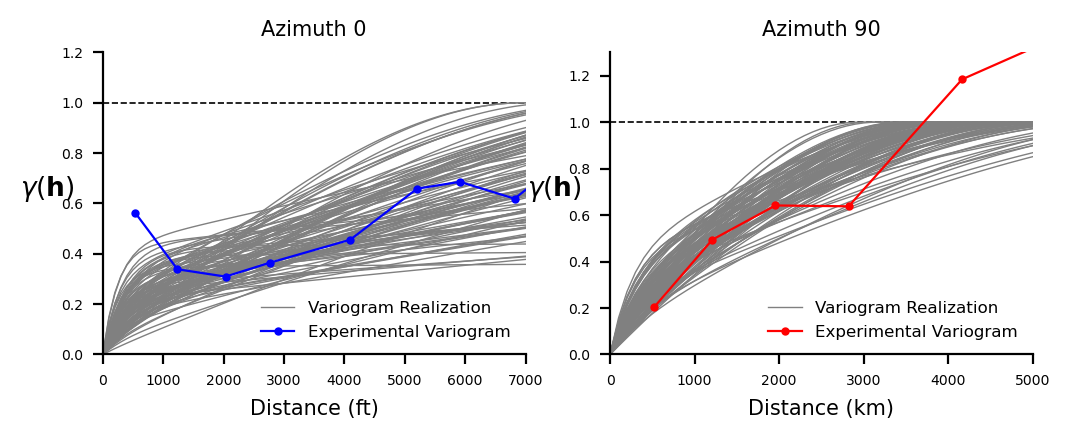

In [19]:
# Plot variogram realizations for Azimuth 0 and 90

fig=plt.figure(figsize=(6, 2), dpi= 200, facecolor='w', edgecolor='k')    
font = {'size'   : 5}
matplotlib.rc('font', **font)

ax1=plt.subplot(1,2,1)
xlim=[0,7000]; vlim=[0,1.2]; sill=1; fsize=5; loc=4; outfile='vargplt_Declustered.png'
plt.axhline(y=sill,linewidth=0.6,color='k',linestyle='--')
plt.title('Azimuth 0',fontsize=fsize*1.5)  
plt.xlabel(xlabl,fontsize=fsize*1.5)
ylabl='$\gamma (\mathbf{h}) $'
plt.ylabel(ylabl,rotation=0,fontsize=fsize*1.9,labelpad=5)
plt.xlim(float(xlim[0]),float(xlim[1]))
plt.ylim(float(vlim[0]),float(vlim[1])) 
#       
symbol1= '-ob'; symbol2= '-g'; symbol3= '--'; label1='Experimental Variogram'
label2='Variogram Realization ';label3='Fitted Variogram (Declustered)'; xlabl='Distance (km)' 

for i in range(nsim):
    if(i==0):
        plt.plot(Lag_f_0[i], Gamma_f_0[i],symbol2,color='gray',linewidth=0.5,markersize=1.5,label=label2)   
    else:      
        plt.plot(Lag_f_0[i], Gamma_f_0[i],symbol2,color='gray',linewidth=0.5,markersize=1.5) 
        
plt.plot(Lag1, Var1,symbol1,linewidth=0.8,markersize=2,label=label1)        
fsizet=fsize*1.2    
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.legend(fontsize=str(fsizet),loc=loc,frameon=False)

ax2=plt.subplot(1,2,2)
xlim=[0,5000]; vlim=[0,1.3]; sill=1; fsize=5; loc=4; outfile='vargplt_Declustered.png'
plt.axhline(y=sill,linewidth=0.6,color='k',linestyle='--')
plt.title('Azimuth 90',fontsize=fsize*1.5)  
plt.xlabel(xlabl,fontsize=fsize*1.5)
ylabl='$\gamma (\mathbf{h}) $'
plt.ylabel(ylabl,rotation=0,fontsize=fsize*1.9,labelpad=5)
plt.xlim(float(xlim[0]),float(xlim[1]))
plt.ylim(float(vlim[0]),float(vlim[1])) 
#       
symbol1= '-or'; symbol2= '-g'; symbol3= '--'; label1='Experimental Variogram'
label2='Variogram Realization ';label3='Fitted Variogram (Declustered)'; xlabl='Distance (km)' 

for i in range(nsim):
    if(i==0):
        plt.plot(Lag_f_90[i], Gamma_f_90[i],symbol2,color='gray',linewidth=0.5,markersize=1.5,label=label2)   
    else:      
        plt.plot(Lag_f_90[i], Gamma_f_90[i],symbol2,color='gray',linewidth=0.5,markersize=1.5) 
        
plt.plot(Lag2, Var2,symbol1,linewidth=0.8,markersize=2,label=label1)        
        
fsizet=fsize*1.2    

plt.legend(fontsize=str(fsizet),loc=loc,frameon=False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
fig.savefig(outfile, bbox_inches='tight')

**100 realizations of variogram uncertainty for Azimuth 0 and 90. Realzations should the correlation between variables**

## Transfer Variogram Uncertainty in Geostatistical Modeling (SGS)

Variogram uncertainty is more influential in flow simulation because it affects the connectivity of rock properties.

In order to incorporate the uncertainty in variogram into our model, each calculated variogram realization is applied in conditional simulation one at the time; for exmaple to generate 100 realizations of geostatistical simulation, 100 variogram realizations are needed. In conventional geostatistical modeling, only one variogram model is applied that variogram uncertainty is not incorporated in the model.

Below shows 6 realization of sequential Gaussian simulation (SGS) with 6 diffent generated variogram realization.

In [20]:
nsim_=100
# Parameter file of SGS
for isim in range(nsim_):
    txt="                 Parameters for SGSIM \n"\
    +"                      ********************** \n"\
    +"START OF PARAMETERS:\n"\
    +"Data.out              -file with data\n"\
    +"2  3  0  5  0  0              -  columns for X,Y,Z,vr,wt,sec.var.\n"\
    +"-998.0       1.0e21           -  trimming limits\n"\
    +"1                             -transform the data (0=no, 1=yes)\n"\
    +"./Simulation/sgsim.trn                     -  file for output trans table\n"\
    +"0                             -  consider ref. dist (0=no, 1=yes)\n"\
    +"file.out                  -  file with ref. dist distribution\n"\
    +"1  0                          -  columns for vr and wt\n"\
    +"0    27                -  zmin,zmax (for tail extrapolation)\n"\
    +"1       4.0                   -  lower tail option (1=linear), parameter\n"\
    +"1      11.5                   -  upper tail option (1=linear), parameter\n"\
    +"1                             -debugging level: 0,1,2,3\n"\
    +"./Simulation/sgsim.dbg                     -file for debugging output\n"\
    +"./Simulation/sgsim_"+str(isim+1)+"                         -file for simulation output\n"\
    +"1                            -number of realizations to generate\n"\
    +"100   50   100                  -nx,xmn,xsiz\n"\
    +"110   50   100                -ny,ymn,ysiz\n"\
    +"1    1    1                     -nz,zmn,zsiz\n"\
    +str(10520+isim)+"                         -random number seed\n"\
    +"4     24                      -min and max original data for sim\n"\
    +"24                            -number of simulated nodes to use\n"\
    +"1                             -assign data to nodes (0=no, 1=yes)\n"\
    +"1     3                       -multiple grid search (0=no, 1=yes),num\n"\
    +'0                 -maximum data per octant (0=not used)\n'\
    +str(hmaj2_0[isim])+"   "+str(hmaj2_90[isim])+"       1.0                 -maximum search radii\n"\
    +"0   0.0   0.0                 -angles for search ellipsoid\n"\
    +"0     0.60   1.0              -ktype: 0=SK,1=OK,2=LVM,3=EXDR,4=COLC, corr and VRF\n"\
    +"lvmfl.dat                     -  file with LVM, EXDR, or COLC variable\n"\
    +"1                             -  column for secondary variable\n"\
    +str(nst[isim])+"   "+str(nug[isim])+"                   -nst, nugget effect\n"\
    +str(it1[isim])+"   "+str(cc1[isim])+ "  0   0.0   0.0     -it,cc,ang1,ang2,ang3 \n"\
    +"         "+str(hmaj1_0[isim])+"   "+str(hmin1_90[isim])+ "  1.0     -a_hmax, a_hmin, a_vert \n"\
    +str(it2[isim])+"   "+str(cc2[isim])+ "  0   0.0   0.0     -it,cc,ang1,ang2,ang3\n"\
    +"         "+str(hmaj2_0[isim])+"   "+str(hmin2_90[isim])+ "  1.0     -a_hmax, a_hmin, a_vert \n"
    #
    f1 = open('temp', "w");
    f1.write(txt)
    f1.close()

    ! echo temp | sgsim
    ! rm temp
    
clear_output()

### Variogram Realization 1 for SGS Simulation

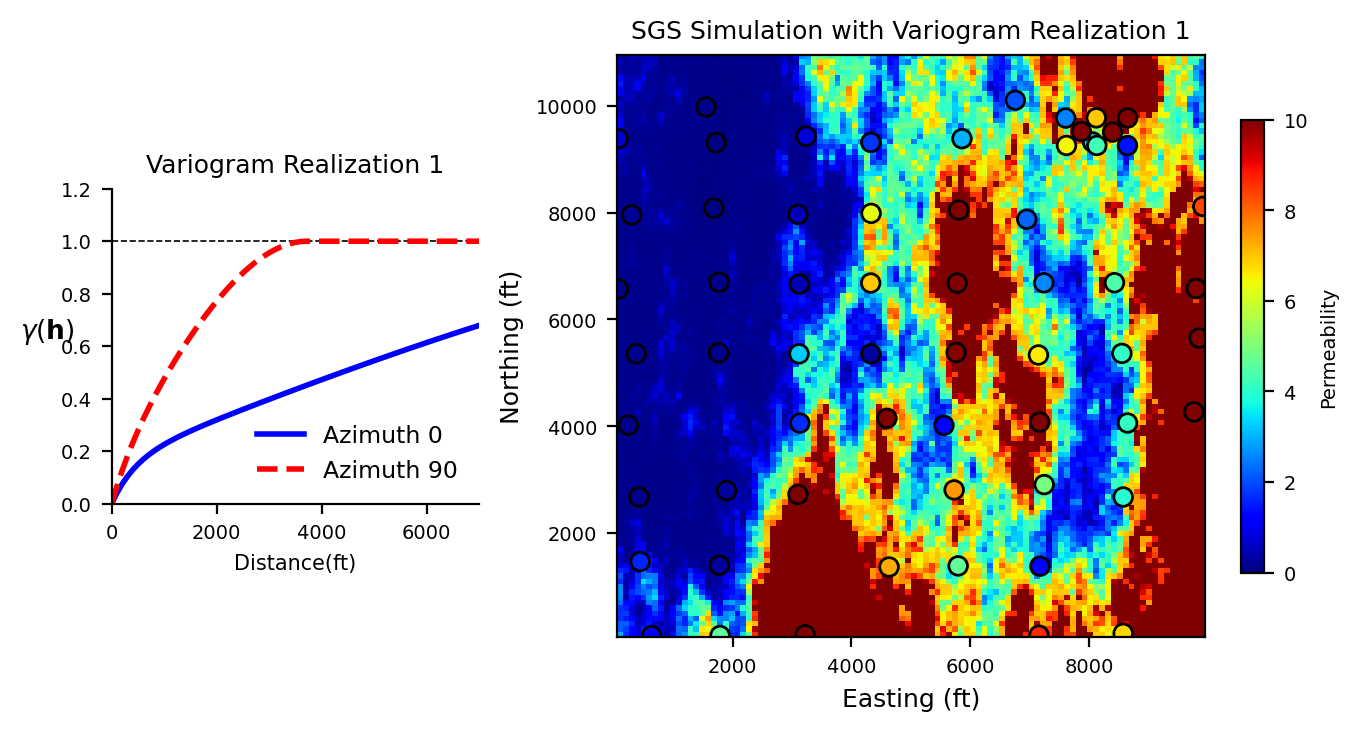

In [21]:
isim=1
font = {'size'   : 7}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(8, 5), dpi= 200, facecolor='w', edgecolor='k')
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2], wspace=0.25)
ax1=plt.subplot(gs[0])
vargunshow(isim)
ax2=plt.subplot(gs[1])
show_sim(isim)

### Variogram Realization 2 for SGS Simulation

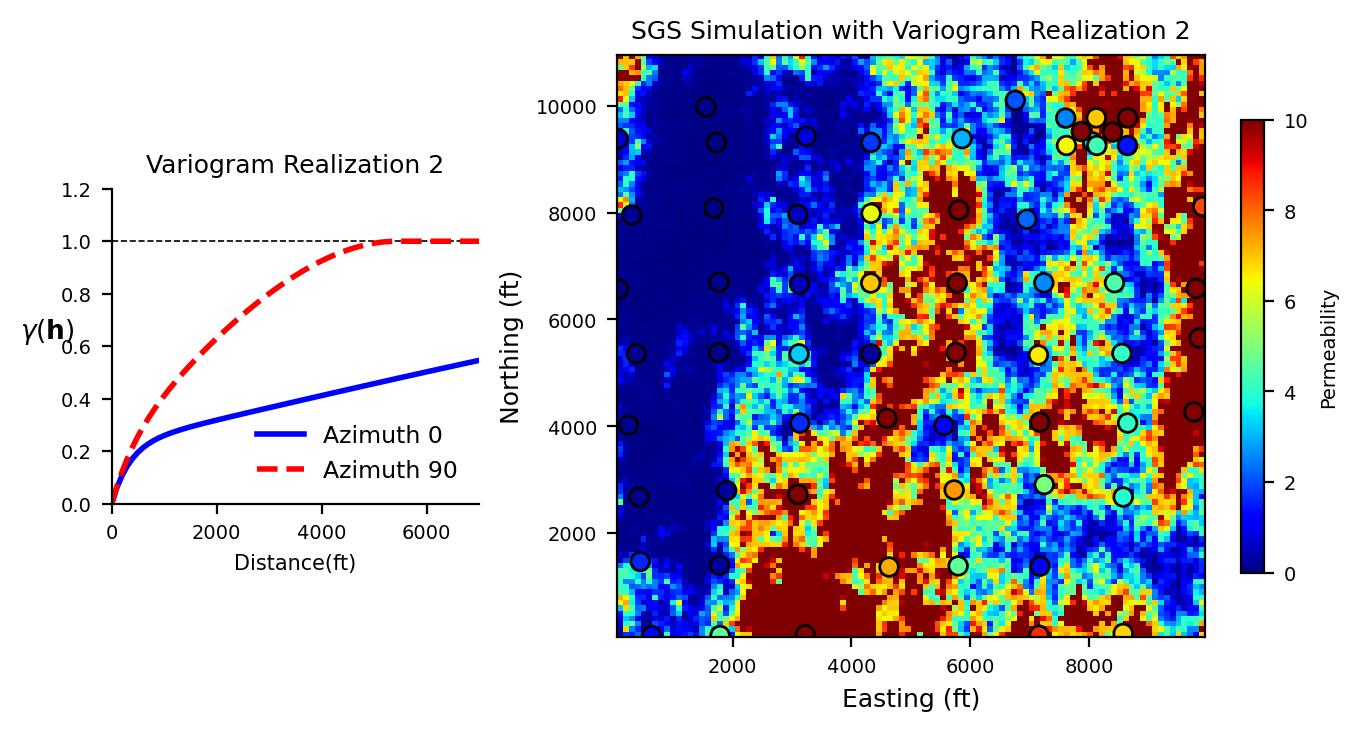

In [22]:
isim=2
font = {'size'   : 7}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(8, 5), dpi= 200, facecolor='w', edgecolor='k')
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2], wspace=0.25)
ax1=plt.subplot(gs[0])
vargunshow(isim)
ax2=plt.subplot(gs[1])
show_sim(isim)

### Variogram Realization 3 for SGS Simulation

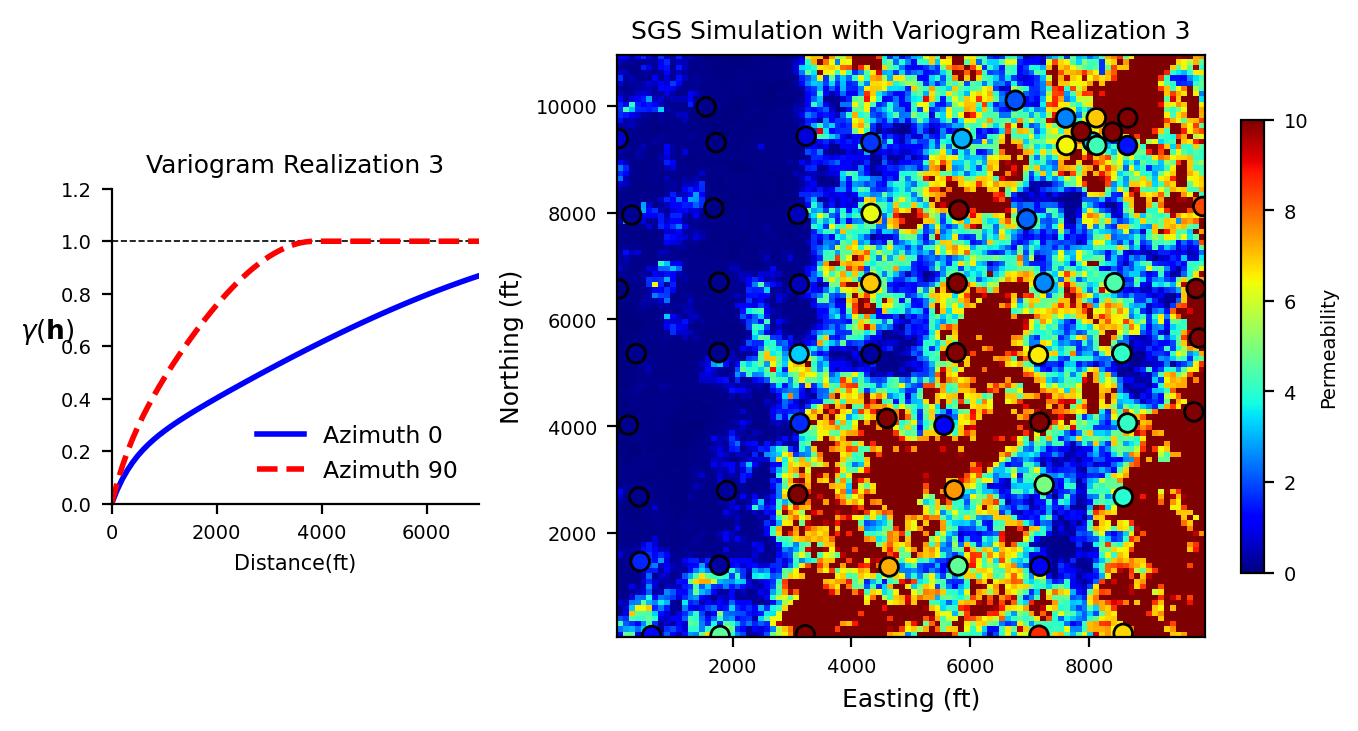

In [23]:
isim=3
font = {'size'   : 7}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(8, 5), dpi= 200, facecolor='w', edgecolor='k')
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2], wspace=0.25)
ax1=plt.subplot(gs[0])
vargunshow(isim)
ax2=plt.subplot(gs[1])
show_sim(isim)

### Variogram Realization 4 for SGS Simulation

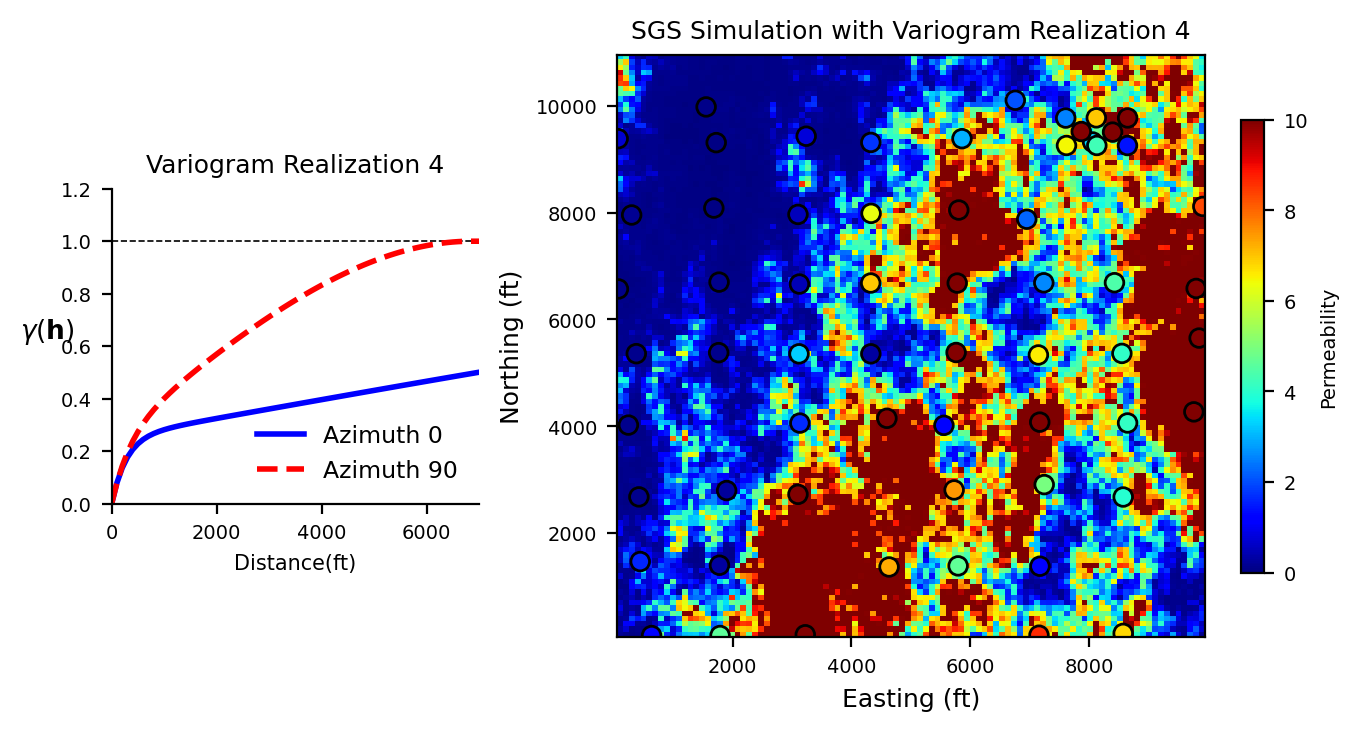

In [24]:
isim=4
font = {'size'   : 7}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(8, 5), dpi= 200, facecolor='w', edgecolor='k')
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2], wspace=0.25)
ax1=plt.subplot(gs[0])
vargunshow(isim)
ax2=plt.subplot(gs[1])
show_sim(isim)

### Variogram Realization 5 for SGS Simulation

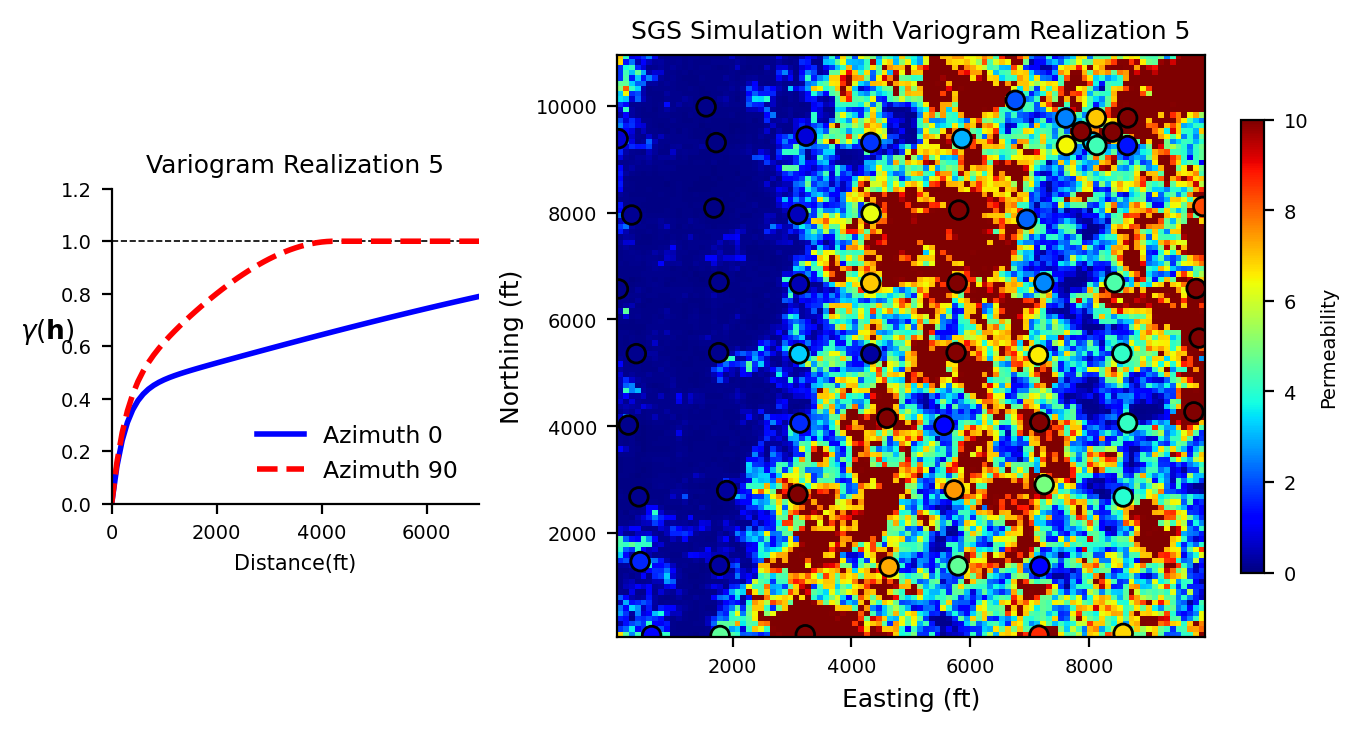

In [25]:
isim=5
font = {'size'   : 7}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(8, 5), dpi= 200, facecolor='w', edgecolor='k')
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2], wspace=0.25)
ax1=plt.subplot(gs[0])
vargunshow(isim)
ax2=plt.subplot(gs[1])
show_sim(isim)

# Uncertainty in Sum of all Simulated Values with Variogram Uncertainty

After calculating 100 variogram realizations and incorporate them in geostatistical simulation, final distribution of uncertainty in final respond can be achieved. This could uncertainty in sum of all cell (uncertainty in resource estimation). 

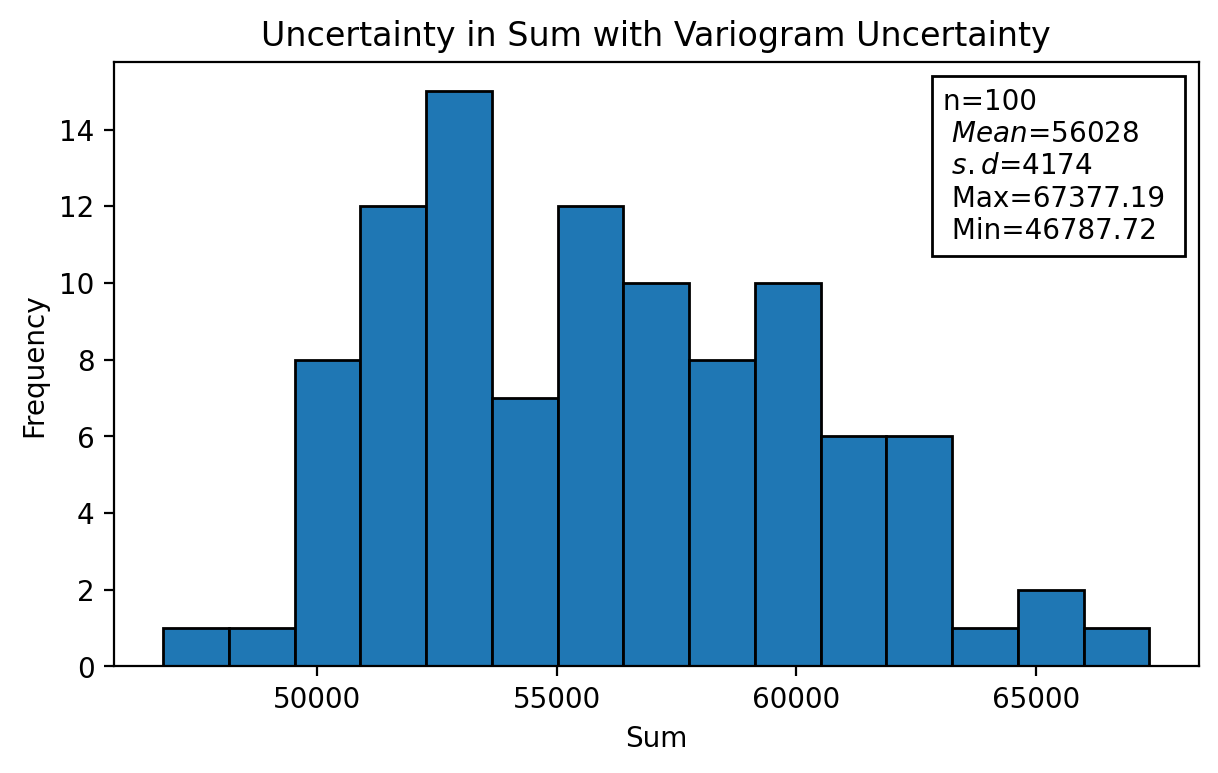

In [26]:
# Plot histogram of uncertainty for sum of values (resource estimation)

font = {'size'   :10 }
#
matplotlib.rc('font', **font)
fig=plt.figure(figsize=(7, 4), dpi= 200, facecolor='w', edgecolor='k')
sum_=[]
for isim in range(nsim):    
    txt= './Simulation/sgsim_'+str(isim+1)
    with open(txt) as f:
        vt1=[]
        for i in range(3):
            next(f)    
        for line in f:
            p = line.split()      
            vt1.append(float(p[0]))
    sum_.append(sum(vt1))        
histplt (sum_,15,title='Uncertainty in Sum with Variogram Uncertainty'
         ,xlabl='Sum',xlimt=None,ylimt=None,axt=None)

# Appendix

In [27]:
 def GSLIB_View(File):
    """a fucntion to convert ASCII flat file compatible with Geo-EAS to Pandas Data Frame"""
    with open(File, 'r') as f:
        next(f)
        txt=[] 
        tmp_val=[]
        value=[]
        ii=0
        for line in f:
            if(ii==0):
                p = line.split()
                no=int(p[0])
            elif ii<=no:
                p = line.replace('\n', '').split()
                txt.append(p[0])  
            else: 
                tmp=[]
                p = line.split()
                for j in range(len(txt)):
                    tmp.append(float(p[j]))  
                tmp_val.append(tmp)
            ii+=1 
            
        for j in range(len(txt)):
            tmp=[]
            for k in range(len(tmp_val)):
                tmp.append(tmp_val[k][j])
            value.append(tmp)            
    f.close()
    
    pd_=["" for x in range(len(txt))]
    
    pd_=[]
    for j in range(len(txt)):
            pd_.append(pd.DataFrame(({txt[j]:value[j]})))
            
    result = pd.concat(pd_, axis=1)
    return result

#######################################################################

def vargunshow(isim):
    """isim: number of variogram uncertainty"""

    xlim=[0,7000]; vlim=[0,1.2]; sill=1; fsize=5; loc=4
    plt.axhline(y=sill,linewidth=0.6,color='k',linestyle='--')
    plt.title('Variogram Realization '+str(isim),fontsize=fsize*1.8)  
    plt.xlabel('Distance(ft)',fontsize=fsize*1.5)
    ylabl='$\gamma (\mathbf{h}) $'
    plt.ylabel(ylabl,rotation=0,fontsize=fsize*1.9,labelpad=5)
    plt.xlim(float(xlim[0]),float(xlim[1]))
    plt.ylim(float(vlim[0]),float(vlim[1])) 
    #       
    label1='Azimuth 0';label2='Azimuth 90' 
    
    plt.plot(Lag_f_0[isim], Gamma_f_0[isim],color='b',linewidth=2,markersize=1.5,label=label1)   
    plt.plot(Lag_f_90[isim], Gamma_f_90[isim],'--r',linewidth=2,markersize=1.5,label=label2)   
          
    fsizet=fsize*1.7    
    plt.gca().set_aspect('5000')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)    
    plt.legend(fontsize=str(fsizet),loc=loc,frameon=False)
    
#######################################################################    
    
def show_sim(isim):
    """Plot simulation realizations"""

    txt= './Simulation/sgsim_'+str(isim)
    plt.scatter(Data['X'], Data['Y'],c=Data['Per'],s=45,linewidths=1,edgecolors='k',
                cmap='jet',vmin=0, vmax=10)
    nx=100; xsiz=100; xmin=50; ny=110; ysiz=100; ymin=50
    xa=np.zeros(nx*ny)
    ya=np.zeros(nx*ny)
    Var1a=np.zeros((ny,nx))
    nxy=nx*ny
    with open(txt) as f:
        vt1=[]
        for i in range(3):
            next(f)    
        for line in f:
            p = line.split()      
            vt1.append(float(p[0])) 
    kk=0
    for j in range(ny):
        for i in range(nx):
            xa[kk]=xmin+(i)*xsiz
            ya[kk]=ymin+(j)*ysiz
            index1=i+1 + (j-1+1)*nx 
            Var1a[j,i]=vt1[index1-1]
            kk=kk+1     
    plt.title('SGS Simulation with Variogram Realization '+str(isim),fontsize=9)
    im = plt.imshow(Var1a, extent=(xa.min(), xa.max(), ya.min(), ya.max()), cmap='jet',
                    origin='lower',vmin=0,vmax=10,aspect=0.9) 
    plt.colorbar(shrink=0.6,label='Permeability')   
    plt.xlabel('Easting (ft)',fontsize='9')
    plt.ylabel('Northing (ft)',fontsize='9')
    plt.show()  
    
#######################################################################    
       
def histplt (val,bins,title,xlabl,xlimt,ylimt,axt=None):
    '''Plot Histogram of Data'''
    #
    ax1 = axt or plt.axes()
    val=np.array(val)
    try:
        bins
    except NameError:
        plt.hist(val, bins=bins,ec='black')   
    else:
        plt.hist(val, bins=bins,ec='black')      
    n=len(val)
    Mean=np.mean(val)
    SD=np.var(val) 
    Max=np.amax(val)
    Min=np.amin(val)
    txt='n=%.0f \n $Mean$=%.0f \n $s.d$=%.0f \n Max=%.2f \n Min=%.2f'
    anchored_text = AnchoredText(txt %(n,Mean,np.sqrt(SD),Max,Min), loc=1)
    ax1.add_artist(anchored_text)
    try:
        title
    except NameError:
        plt.title('Histogram',fontsize=font['size']*1.2)    
    else:
        plt.title(title,fontsize=font['size']*1.2)   
#
    try:
        xlabl
    except NameError:
        pass  # do nothing! 
        plt.xlabel('X',fontsize=font['size'])      
    else:
        plt.xlabel(xlabl,fontsize=font['size'])            
#
    plt.ylabel('Frequency',fontsize=font['size'])
#        
    try:
        xlimt
    except NameError:
        pass  # do nothing! 
    else:
        plt.xlim(xlimt)   
#        
    try:
        ylimt
    except NameError:
        pass  # do nothing! 
    else:
        plt.ylim(ylimt)          